In [81]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [82]:
df = pd.read_csv('./olist_dataset.csv')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-

1. **Récence (R - Recency)** : Cela mesure depuis combien de temps un client n'a pas effectué d'achat. Un client qui a acheté récemment est considéré comme plus actif et potentiellement plus engagé.
2. **Fréquence (F - Frequency)** : Cela fait référence à la fréquence à laquelle un client effectue des achats. Un client qui achète régulièrement est souvent considéré comme plus précieux, car il est plus susceptible de rester fidèle à la marque.
3. **Montant (M - Monetary)** : Cela fait référence au montant total dépensé par un client sur une période donnée. Les clients qui dépensent davantage sont généralement considérés comme plus précieux pour l'entreprise.

In [83]:
df_filtered = []
df_filtered = pd.DataFrame(df_filtered)
df_filtered['order_id'] = df['order_id'].copy()
df_filtered['customer_unique_id'] = df['customer_unique_id'].copy()
df_filtered

,order_id,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8
...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660
119139,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30
119140,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c
119141,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c


In [84]:
df_filtered = df_filtered.drop_duplicates(subset=['order_id'])
df_filtered

,order_id,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8
5,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977
6,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...
119137,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a
119138,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660
119139,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30
119140,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c


In [85]:
occurrences = df_filtered['customer_unique_id'].value_counts()
occurrences = occurrences[occurrences > 1]

In [86]:
df_filterX = pd.DataFrame({'customer_unique_id': occurrences.index})
df_filterX

,customer_unique_id
0,8d50f5eadf50201ccdcedfb9e2ac8455
1,3e43e6105506432c953e165fb2acf44c
2,1b6c7548a2a1f9037c1fd3ddfed95f33
3,ca77025e7201e3b30c44b472ff346268
4,6469f99c1f9dfae7733b25662e7f1782
...,...
2992,a2c15de05ef380b5a7eaf915898926db
2993,92046e40af14f7f88398c748bb559cfe
2994,6ff62b85b8dd35a3402d54618bdafec6
2995,6457b2cb5462c1217e8e6d36b0ff39d2


In [87]:
df_filtered = df[df['customer_unique_id'].isin(df_filterX['customer_unique_id'])]
df_filtered = df_filtered.drop_duplicates(subset=['order_id'])
df_filtered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
19,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,1.0,credit_card,10.0,146.45,5a8608437f4b52bec5cd143f37258b5e,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07,1.0,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.40,14.05,39.0,991.0,3.0,150.0,20.0,20.0,20.0,71931.0,brasilia,DF,-15.836123,-48.040185,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,-16.712157,-49.248251,perfumery
20,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,1.0,credit_card,10.0,1376.45,0,no score,no title,no message,1900-01-01 00:00:00,1900-01-01 00:00:00,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,8840.0,mogi das cruzes,SP,-23.477093,-46.135384,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ,-22.878477,-43.315170,construction_tools_construction
51,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,1900-02-01 00:00:00,2018-06-28 00:00:00,1.0,boleto,1.0,22.36,5853e27c64b89e222c5e4edf78bec3d4,1.0,no title,no message,2018-07-01 00:00:00,2018-07-11 20:41:18,1.0,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,59.0,1782.0,1.0,125.0,25.0,14.0,18.0,11701.0,praia grande,SP,-24.011288,-46.418734,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,-23.175897,-46.886594,health_beauty
53,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,1.0,credit_card,1.0,54.82,bcab37e37778893d858b3d159849a56d,4.0,no title,no message,2017-05-26 00:00:00,2017-06-01 19:10:49,1.0,ba4bfbf74dbe7ab37e263b9326da0523,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-18 20:42:45,36.90,17.92,60.0,521.0,1.0,650.0,24.0,10.0,20.0,13324.0,salto,SP,-23.205917,-47.307846,c2551ea089b7ebbc67a2ea8757152514,44380,cruz das almas,BA,-12.655868,-39.100448,sports_leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118972,58edf3f5f282ab91e0f6a6f2b85af02a,14945bc802d49b0f9f68f2ea8fd060c4,delivered,2018-05-07 09:01:58,2018-05-08 04:34:

In [88]:
date_recente = df_filtered['order_purchase_timestamp'].max()
date_recente

'2018-10-16 20:16:02'

In [89]:
date_etude = pd.to_datetime('2018-11-01 00:00:00')
df_filtered['Recency'] = date_etude - (pd.to_datetime(df_filtered['order_purchase_timestamp']))
df_filtered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,Recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,394 days 13:03:27
19,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,1.0,credit_card,10.0,146.45,5a8608437f4b52bec5cd143f37258b5e,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07,1.0,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.40,14.05,39.0,991.0,3.0,150.0,20.0,20.0,20.0,71931.0,brasilia,DF,-15.836123,-48.040185,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,-16.712157,-49.248251,perfumery,146 days 04:56:48
20,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,1.0,credit_card,10.0,1376.45,0,no score,no title,no message,1900-01-01 00:00:00,1900-01-01 00:00:00,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,8840.0,mogi das cruzes,SP,-23.477093,-46.135384,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ,-22.878477,-43.315170,construction_tools_construction,302 days 04:59:17
51,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,1900-02-01 00:00:00,2018-06-28 00:00:00,1.0,boleto,1.0,22.36,5853e27c64b89e222c5e4edf78bec3d4,1.0,no title,no message,2018-07-01 00:00:00,2018-07-11 20:41:18,1.0,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,59.0,1782.0,1.0,125.0,25.0,14.0,18.0,11701.0,praia grande,SP,-24.011288,-46.418734,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,-23.175897,-46.886594,health_beauty,149 days 07:15:12
53,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,1.0,credit_card,1.0,54.82,bcab37e37778893d858b3d159849a56d,4.0,no title,no message,2017-05-26 00:00:00,2017-06-01 19:10:49,1.0,ba4bfbf74dbe7ab37e263b9326da0523,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-18 20:42:45,36.90,17.92,60.0,521.0,1.0,650.0,24.0,10.0,20.0,13324.0,salto,SP,-23.205917,-47.307846,c2551ea089b7ebbc67a2ea8757152514,44380,cruz das almas,BA,-12.655868,-39.100448,sports_leisure,535 days 03:31:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118972,58edf3f5f28

In [90]:
df_filtered['order_purchase_timestamp'] = pd.to_datetime(df_filtered['order_purchase_timestamp'])
df_filtered['derniere_commande'] = df_filtered.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')
df_filtered['premiere_commande'] = df_filtered.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')

occurrences = df_filtered['customer_unique_id'].value_counts()
occurrences = occurrences.reset_index()
occurrences.columns = ['customer_unique_id', 'nombre_occurrences']
df_filtered = pd.merge(df_filtered, occurrences, on='customer_unique_id' , how='left')

df_filtered['Frequency'] = df_filtered['nombre_occurrences'] / (df_filtered['derniere_commande'] - df_filtered['premiere_commande']).dt.days
df_filtered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,Recency,derniere_commande,premiere_commande,nombre_occurrences,Frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,394 days 13:03:27,2017-10-02 10:56:33,2017-09-04 11:26:38,2,0.074074
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,1.0,credit_card,10.0,146.45,5a8608437f4b52bec5cd143f37258b5e,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07,1.0,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.40,14.05,39.0,991.0,3.0,150.0,20.0,20.0,20.0,71931.0,brasilia,DF,-15.836123,-48.040185,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,-16.712157,-49.248251,perfumery,146 days 04:56:48,2018-06-07 19:03:12,2016-10-06 19:33:34,2,0.003289
2,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,1.0,credit_card,10.0,1376.45,0,no score,no title,no message,1900-01-01 00:00:00,1900-01-01 00:00:00,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,8840.0,mogi das cruzes,SP,-23.477093,-46.135384,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ,-22.878477,-43.315170,construction_tools_construction,302 days 04:59:17,2018-01-02 19:00:43,2017-07-04 21:57:51,2,0.011050
3,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,1900-02-01 00:00:00,2018-06-28 00:00:00,1.0,boleto,1.0,22.36,5853e27c64b89e222c5e4edf78bec3d4,1.0,no title,no message,2018-07-01 00:00:00,2018-07-11 20:41:18,1.0,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,59.0,1782.0,1.0,125.0,25.0,14.0,18.0,11701.0,praia grande,SP,-24.011288,-46.418734,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,-23.175897,-46.886594,health_beauty,149 days 07:15:12,2018-06-04 16:44:48,2018-06-03 23:08:46,2,inf
4,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,1.0,credit_card,1.0,54.82,bcab37e37778893d858b3d159849a56d,4.0,no title,no message,2017-05-26 00:00:00,2017-06-01 19:10:49,1.0,ba4bfbf74dbe7ab37e263b9326da0523,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-18 20:42:45,36.90,17.92,60.0,521.0,1.0,650.0,24.0,10.0,20.0,13324.0,salto,SP,-23.205917,-47.307846,c2551ea089b7ebbc67a2ea8757152514,44380,cruz das al

In [91]:
df_filtered['Monetary'] = df_filtered.groupby('customer_unique_id')['price'].transform('sum')

In [92]:
df_filtered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,Recency,derniere_commande,premiere_commande,nombre_occurrences,Frequency,Monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,394 days 13:03:27,2017-10-02 10:56:33,2017-09-04 11:26:38,2,0.074074,65.38
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,1.0,credit_card,10.0,146.45,5a8608437f4b52bec5cd143f37258b5e,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07,1.0,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.40,14.05,39.0,991.0,3.0,150.0,20.0,20.0,20.0,71931.0,brasilia,DF,-15.836123,-48.040185,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,-16.712157,-49.248251,perfumery,146 days 04:56:48,2018-06-07 19:03:12,2016-10-06 19:33:34,2,0.003289,174.39
2,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,1.0,credit_card,10.0,1376.45,0,no score,no title,no message,1900-01-01 00:00:00,1900-01-01 00:00:00,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12 19:09:04,1299.00,77.45,38.0,143.0,2.0,20850.0,100.0,25.0,50.0,8840.0,mogi das cruzes,SP,-23.477093,-46.135384,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ,-22.878477,-43.315170,construction_tools_construction,302 days 04:59:17,2018-01-02 19:00:43,2017-07-04 21:57:51,2,0.011050,1355.90
3,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,1900-02-01 00:00:00,2018-06-28 00:00:00,1.0,boleto,1.0,22.36,5853e27c64b89e222c5e4edf78bec3d4,1.0,no title,no message,2018-07-01 00:00:00,2018-07-11 20:41:18,1.0,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,59.0,1782.0,1.0,125.0,25.0,14.0,18.0,11701.0,praia grande,SP,-24.011288,-46.418734,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,-23.175897,-46.886594,health_beauty,149 days 07:15:12,2018-06-04 16:44:48,2018-06-03 23:08:46,2,inf,28.98
4,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,1.0,credit_card,1.0,54.82,bcab37e37778893d858b3d159849a56d,4.0,no title,no message,2017-05-26 00:00:00,2017-06-01 19:10:49,1.0,ba4bfbf74dbe7ab37e263b9326da0523,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-18 20:42:45,36.90,17.92,60.0,521.0,1.0,650.0,24.0,10.0,20.0,13324.0,salto,SP,-23.205917,-47.307846,c2551ea089b7eb

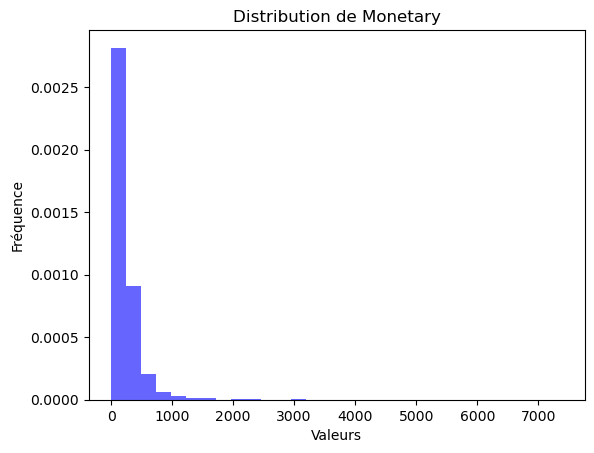

In [93]:
plt.hist(df_filtered['Monetary'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution de Monetary')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

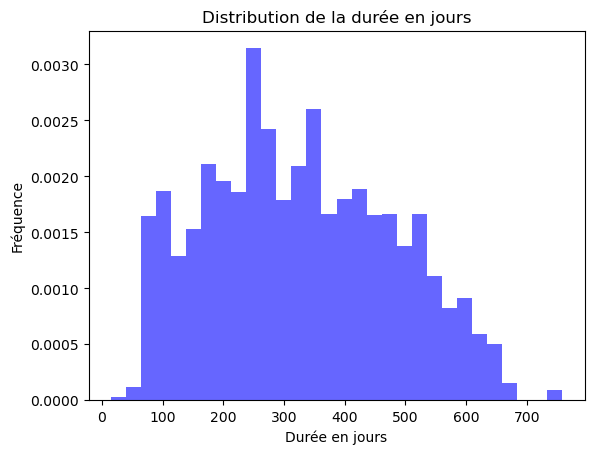

In [94]:
df_filtered['Recency'] = df_filtered['Recency'].dt.days

plt.hist(df_filtered['Recency'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution de la durée en jours')
plt.xlabel('Durée en jours')
plt.ylabel('Fréquence')
plt.show()

In [95]:
df_without_naninf = df_filtered[df_filtered['Frequency'] > 0].copy()
df_without_naninf.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
df_without_naninf = df_without_naninf.dropna(subset=['Frequency'])

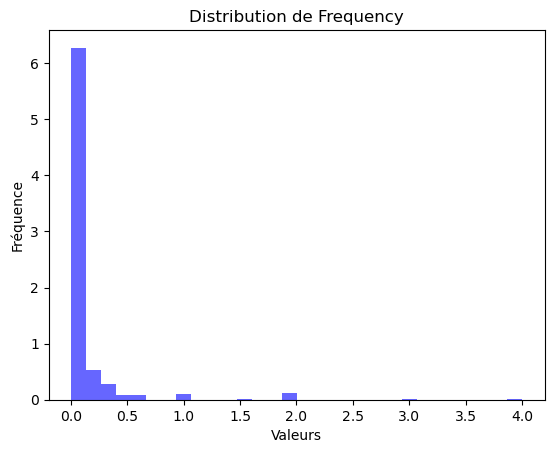

In [96]:
plt.hist(df_without_naninf['Frequency'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution de Frequency')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

In [97]:
from scipy.stats import shapiro
data = df_without_naninf['Frequency']
stat, p= shapiro(data)
print('stat=%.3f, p=%.3f'% (stat, p))
if p> 0.05:
       print('Probably Gaussian')
else:
       print('Probably not Gaussian')

stat=0.335, p=0.000
Probably not Gaussian


In [98]:
from scipy.stats import shapiro
data = df_without_naninf['Recency']
stat, p= shapiro(data)
print('stat=%.3f, p=%.3f'% (stat, p))
if p> 0.05:
       print('Probably Gaussian')
else:
       print('Probably not Gaussian')

stat=0.970, p=0.000
Probably not Gaussian


In [99]:
from scipy.stats import shapiro
data = df_without_naninf['Monetary']
stat, p= shapiro(data)
print('stat=%.3f, p=%.3f'% (stat, p))
if p> 0.05:
       print('Probably Gaussian')
else:
       print('Probably not Gaussian')

stat=0.670, p=0.000
Probably not Gaussian


In [100]:
print(df_without_naninf['Frequency'].skew())
print(df_without_naninf['Recency'].skew())
print(df_without_naninf['Monetary'].skew())

6.147714696592515
0.2774012961390734
4.1402398776037845


In [101]:
df_without_naninf['Frequency'] = np.log(df_without_naninf['Frequency'])
df_without_naninf['Monetary'] = df_without_naninf['Monetary'] + 1
df_without_naninf['Monetary'] = np.log(df_without_naninf['Monetary'])
df_without_naninf.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,Recency,nombre_occurrences,Frequency,Monetary
count,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000
mean,1.034415,3.173170,149.806133,0.976765,108.730239,18.743604,47.251644,746.467777,2.082420,1938.289347,29.465804,15.440377,22.431390,24281.471942,-22.294705,-46.238526,33000.608067,-21.564403,-46.231816,314.071898,2.313897,-3.379042,5.183717
std,0.373889,2.940587,183.334429,0.150667,141.062083,13.121928,13.338271,666.883738,1.681829,3553.105071,16.740544,12.652319,12.005362,27675.690084,4.322196,7.431329,29449.774648,5.130038,3.929853,153.300800,1.164265,1.390250,0.830625
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.159469,-56.102960,1005.000000,-36.605374,-67.837869,15.000000,2.000000,-5.717028,0.000000
25%,1.000000,1.000000,59.232500,1.000000,38.750000,12.690000,41.000000,313.000000,1.000000,250.000000,18.000000,8.000000,14.000000,6162.000000,-23.614118,-48.831547,9450.000000,-23.587832,-47.898373,186.000000,2.000000,-4.465908,4.672735
50%,1.000000,2.000000,103.040000,1.000000,71.000000,16.050000,51.000000,570.000000,1.000000,650.000000,24.000000,12.000000,20.000000,13920.000000,-23.301396,-46.755211,22621.000000,-22.962511,-46.621521,300.000000,2.000000,-3.637586,5.193151
75%,1.000000,5.000000,175.870000,1.000000,133.675000,20.360000,57.000000,938.750000,3.000000,1670.000000,37.000000,20.000000,30.000000,25708.750000,-21.766477,-46.518082,48668.000000,-20.537598,-43.660200,432.000000,2.000000,-2.525729,5.705082
max,17.000000,21.000000,3184.340000,1.000000,3109.990000,196.940000,64.000000,3956.000000,15.000000,30000.000000,105.000000,105.000000,93.000000,99500.000000,0.000000,0.000000,99750.000000,2.803299,-34.826655,758.000000,17.000000,1.386294,8.149024


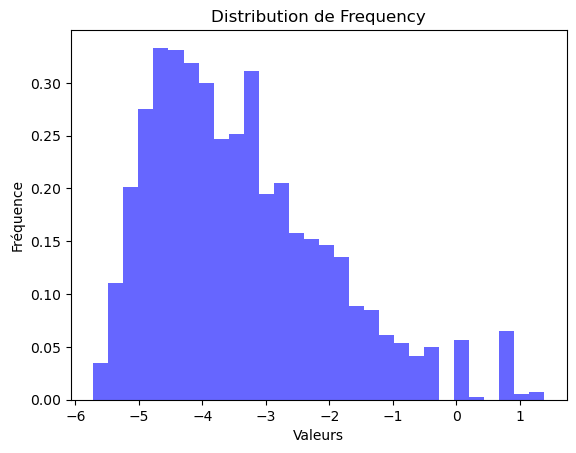

In [102]:
plt.hist(df_without_naninf['Frequency'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution de Frequency')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

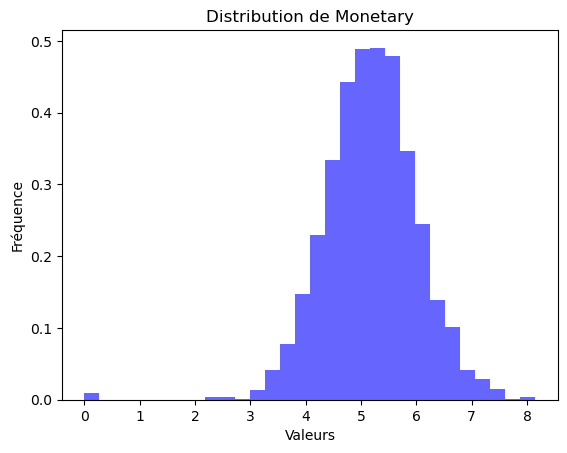

In [103]:
plt.hist(df_without_naninf['Monetary'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution de Monetary')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

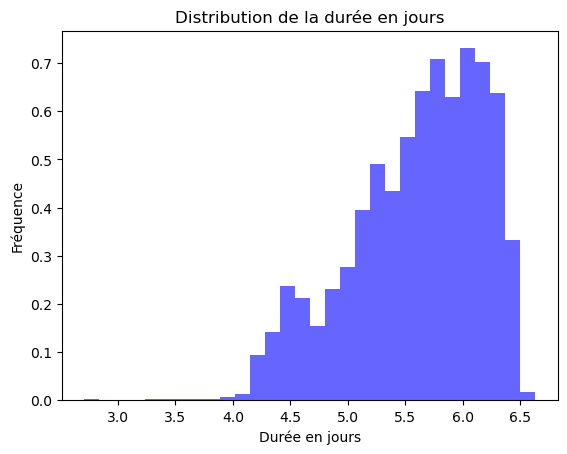

In [104]:
df_without_naninf['Recency'] = np.log(df_without_naninf['Recency'])
plt.hist(df_without_naninf['Recency'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution de la durée en jours')
plt.xlabel('Durée en jours')
plt.ylabel('Fréquence')
plt.show()